In [227]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def counts_to_bioz(counts):
    vref = 1
    bioz_gain = 10
    i_mag = 45.249e-6
    two_over_pi=2/np.pi
    
    bioz = (counts * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag)
    
    return bioz

# 109312.00 1311.00 -1852.00
# 3416.00 5445.00 -6321.00
counts_to_bioz(7891.00)

52.248402576945736

### Manual calibration

In [228]:
# globals
vref = 1
bioz_gain = 10
i_mag = 45.249e-6

df = pd.read_csv("logs_in-house-system/calibration/offsets.txt", sep=" ")
df_131k = df[df["frq"] == 131328.0]
df_4k = df[df["frq"] == 4104.0]

print(df)

I_offset_131k = df_131k["I"].mean()
Q_offset_131k = df_131k["Q"].mean()
I_offset_4k = df_4k["I"].mean()
Q_offset_4k = df_4k["Q"].mean()

print(I_offset_131k, Q_offset_131k)
print(I_offset_4k, Q_offset_4k)


          frq       I       Q
0    131328.0  -108.0   877.0
1      4104.0 -1919.0  -235.0
2    131328.0    80.0  1891.0
3      4104.0 -1236.0   -34.0
4    131328.0    22.0  2654.0
..        ...     ...     ...
289    4104.0    34.0   -24.0
290  131328.0   613.0  1626.0
291    4104.0  -745.0 -1019.0
292  131328.0  -889.0  1115.0
293    4104.0   -51.0  -193.0

[294 rows x 3 columns]
92.89115646258503 1288.1904761904761
-874.2312925170068 42.68027210884354


In [229]:
df = pd.read_csv("logs_in-house-system/calibration/measure_resistor_inphase_2.txt", sep=" ")


df_131k = df[df["frq"] == 131328.0]
df_4k = df[df["frq"] == 4104.0]

# print(df_131k["I"].apply(lambda x: counts_to_bioz(x)))

I_inphase_131k = df_131k["I"].mean()
Q_inphase_131k = df_131k["Q"].mean()
I_inphase_4k = df_4k["I"].mean()
Q_inphase_4k = df_4k["Q"].mean()

print(I_inphase_131k, Q_inphase_131k)
print(I_inphase_4k, Q_inphase_4k)
print(counts_to_bioz(I_inphase_131k), counts_to_bioz(Q_inphase_131k))
print(counts_to_bioz(I_inphase_4k), counts_to_bioz(Q_inphase_4k))

707.4726840855107 -1486.5890736342042
8021.353919239905 -8825.978622327792
4.6843641630074915 -9.843100289662747
53.111510427652775 -58.43914385944739


In [230]:
df = pd.read_csv("logs_in-house-system/calibration/measure_resistor_quadphase_2.txt", sep=" ")

df_131k = df[df["frq"] == 131328.0]
df_4k = df[df["frq"] == 4104.0]

I_quadphase_131k = df_131k["I"].mean()
Q_quadphase_131k = df_131k["Q"].mean()
I_quadphase_4k = df_4k["I"].mean()
Q_quadphase_4k = df_4k["Q"].mean()

print(I_quadphase_131k, Q_quadphase_131k)
print(I_quadphase_4k, Q_quadphase_4k)

-1988.6799065420562 1210.7967289719627
-11883.54906542056 11121.086448598131


In [231]:
calibrated_I_inphase_131k = I_inphase_131k - I_offset_131k
calibrated_I_quadphase_131k = I_quadphase_131k - I_offset_131k
calibrated_Q_inphase_131k = Q_inphase_131k - Q_offset_131k
calibrated_Q_quadphase_131k = Q_quadphase_131k - Q_offset_131k

I_coef_131k = np.sqrt((np.pow(calibrated_I_inphase_131k, 2) + np.pow(calibrated_I_quadphase_131k, 2))) / 250
Q_coef_131k = np.sqrt((np.pow(calibrated_Q_inphase_131k, 2) + np.pow(calibrated_Q_quadphase_131k, 2))) / 250

I_phase_coef_131k = np.degrees(np.arctan(calibrated_I_quadphase_131k / calibrated_I_inphase_131k))
Q_phase_coef_131k = np.degrees(np.arctan(-calibrated_Q_quadphase_131k / -calibrated_Q_inphase_131k))

In [232]:
calibrated_I_inphase_4k = I_inphase_4k - I_offset_4k
calibrated_I_quadphase_4k = I_quadphase_4k - I_offset_4k
calibrated_Q_inphase_4k = Q_inphase_4k - Q_offset_4k
calibrated_Q_quadphase_4k = Q_quadphase_4k - Q_offset_4k

I_coef_4k = np.sqrt((np.pow(calibrated_I_inphase_4k, 2) + np.pow(calibrated_I_quadphase_4k, 2)))/250
Q_coef_4k = np.sqrt((np.pow(calibrated_Q_inphase_4k, 2) + np.pow(calibrated_Q_quadphase_4k, 2)))/250
I_phase_coef_4k = np.degrees(np.arctan(calibrated_I_quadphase_4k / calibrated_I_inphase_4k))
Q_phase_coef_4k = np.degrees(np.arctan(-calibrated_Q_quadphase_4k / -calibrated_Q_inphase_4k))

In [233]:
print("===== COEFICIENTES DE CALIBRACIÓN =====\n")

print("---- Offsets ----")
print(f"4 kHz I Offset: {I_offset_4k}")
print(f"4 kHz Q Offset: {Q_offset_4k}")
print(f"131 kHz I Offset: {I_offset_131k}")
print(f"131 kHz Q Offset: {Q_offset_131k}\n")

print("---- 4 kHz ----")
print(f"I_coef_4k: {I_coef_4k:.6f}")
print(f"Q_coef_4k: {Q_coef_4k:.6f}")
print(f"I_phase_coef_4k [°]: {I_phase_coef_4k:.6f}")
print(f"Q_phase_coef_4k [°]: {Q_phase_coef_4k:.6f}\n")

print("---- 131 kHz ----")
print(f"I_coef_131k: {I_coef_131k:.6f}")
print(f"Q_coef_131k: {Q_coef_131k:.6f}")
print(f"I_phase_coef_131k [°]: {I_phase_coef_131k:.6f}")
print(f"Q_phase_coef_131k [°]: {Q_phase_coef_131k:.6f}")

===== COEFICIENTES DE CALIBRACIÓN =====

---- Offsets ----
4 kHz I Offset: -874.2312925170068
4 kHz Q Offset: 42.68027210884354
131 kHz I Offset: 92.89115646258503
131 kHz Q Offset: 1288.1904761904761

---- 4 kHz ----
I_coef_4k: 56.616113
Q_coef_4k: 56.763960
I_phase_coef_4k [°]: -51.061611
Q_phase_coef_4k [°]: -51.321484

---- 131 kHz ----
I_coef_131k: 8.681611
Q_coef_131k: 11.103435
I_phase_coef_131k [°]: -73.550823
Q_phase_coef_131k [°]: 1.597671


### Applying calibration to load measurements

Sampleset without calibration:

In [234]:
df = pd.read_csv("logs_in-house-system/load_measurement/sampleset_2.txt", sep=" ")

df_4k = df.loc[df["frq"] == 4104.0].copy()
df_131k = df.loc[df["frq"] == 131328.0].copy()

print(counts_to_bioz(df_4k["I"].mean())) # print mean of load's I value for 4.1kHz

40.46264381159633


In [240]:
df_4k["I_offset"] = df_4k["I"] - I_offset_4k
df_4k["Q_offset"] = df_4k["Q"] - Q_offset_4k

df_131k["I_offset"] = df_131k["I"] - I_offset_131k
df_131k["Q_offset"] = df_131k["Q"] - Q_offset_131k

df_4k

,frq,I,Q,Mdiv,Ref,dac,Kdiv,I_offset,Q_offset,Z_real,Z_imag,Z_mag,Z_angle
0,4104.0,6976.0,11525.0,1082130432,32768,128,32,7850.231293,11482.319728,245.058208,18.565402,245.760451,4.332404
2,4104.0,8220.0,5715.0,1082130432,32768,128,32,9094.231293,5672.319728,178.963695,-62.491259,189.560444,-19.248385
4,4104.0,7969.0,8378.0,1082130432,32768,128,32,8843.231293,8335.319728,212.801166,-29.724253,214.867093,-7.951677
6,4104.0,7986.0,6038.0,1082130432,32768,128,32,8860.231293,5995.319728,180.808270,-55.720334,189.199329,-17.127916
8,4104.0,5656.0,5301.0,1082130432,32768,128,32,6530.231293,5258.319728,144.807565,-31.823651,148.263198,-12.394581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,4104.0,7349.0,6867.0,1082130432,32768,128,32,8223.231293,6824.319728,185.138150,-37.841909,188.965988,-11.552034
846,4104.0,4614.0,4558.0,1082130432,32768,128,32,5488.231293,4515.319728,123.022179,-25.688254,125.675546,-11.794458
848,4104.0,3055.0,6554.0,1082130432,32768,128,32,3929.231293,6511.319728,133.166665,17.705330,134.338525,7.573410
850,4104.0,7301.0,5133.0,1082130432,32768,128,32,8175.231293,5090.319728,160.757913,-56.273152,170.322559,-19.292549


In [266]:
import numpy as np

# ---------- 4 kHz ----------
I_cal_real_4k = (df_4k["I_offset"] / I_coef_4k) * np.cos(np.radians(I_phase_coef_4k))
I_cal_imag_4k = (df_4k["I_offset"] / I_coef_4k) * np.sin(np.radians(I_phase_coef_4k))
Q_cal_real_4k = (df_4k["Q_offset"] / Q_coef_4k) * np.sin(np.radians(Q_phase_coef_4k))
Q_cal_imag_4k = (df_4k["Q_offset"] / Q_coef_4k) * np.cos(np.radians(Q_phase_coef_4k))

load_real_4k  = I_cal_real_4k - Q_cal_real_4k
load_imag_4k  = I_cal_imag_4k + Q_cal_imag_4k
load_mag_4k   = np.sqrt(load_real_4k**2 + load_imag_4k**2)
load_angle_4k = np.degrees(np.arctan2(load_imag_4k, load_real_4k))

df_4k["Z_real"]  = load_real_4k
df_4k["Z_imag"]  = load_imag_4k
df_4k["Z_mag"]   = load_mag_4k
df_4k["Z_angle"] = load_angle_4k

# ---------- 131 kHz ----------
I_cal_real_131k = (df_131k["I_offset"] / I_coef_131k) * np.cos(np.radians(I_phase_coef_131k))
I_cal_imag_131k = (df_131k["I_offset"] / I_coef_131k) * np.sin(np.radians(I_phase_coef_131k))
Q_cal_real_131k = (df_131k["Q_offset"] / Q_coef_131k) * np.sin(np.radians(Q_phase_coef_131k))
Q_cal_imag_131k = (df_131k["Q_offset"] / Q_coef_131k) * np.cos(np.radians(Q_phase_coef_131k))

load_real_131k  = I_cal_real_131k - Q_cal_real_131k
load_imag_131k  = I_cal_imag_131k + Q_cal_imag_131k
load_mag_131k   = np.sqrt(load_real_131k**2 + load_imag_131k**2)
load_angle_131k = np.degrees(np.arctan2(load_imag_131k, load_real_131k))

df_131k["Z_real"]  = load_real_131k
df_131k["Z_imag"]  = load_imag_131k
df_131k["Z_mag"]   = load_mag_131k
df_131k["Z_angle"] = load_angle_131k

df_131k

,frq,I,Q,Mdiv,Ref,dac,Kdiv,I_offset,Q_offset,Z_real,Z_imag,Z_mag,Z_angle,Z_real_ohm,Z_imag_ohm
1,131328.0,-314.0,-15070.0,1082130432,32768,128,1,-406.891156,-16358.190476,27.804429,-1427.732348,1428.003062,-88.884332,0.184100,-9.453394
3,131328.0,562.0,-17520.0,1082130432,32768,128,1,469.108844,-18808.190476,62.528592,-1745.072114,1746.192002,-87.947883,0.414018,-11.554585
5,131328.0,266.0,-17412.0,1082130432,32768,128,1,173.108844,-18700.190476,52.602885,-1702.649589,1703.461971,-88.230426,0.348298,-11.273694
7,131328.0,-1068.0,-16488.0,1082130432,32768,128,1,-1160.891156,-17776.190476,6.772141,-1472.095365,1472.110942,-89.736422,0.044840,-9.747134
9,131328.0,-742.0,-16496.0,1082130432,32768,128,1,-834.891156,-17784.190476,17.425243,-1508.829316,1508.929934,-89.338329,0.115377,-9.990359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,131328.0,-1116.0,-16276.0,1082130432,32768,128,1,-1208.891156,-17564.190476,4.674206,-1447.706961,1447.714506,-89.815010,0.030949,-9.585652
845,131328.0,-1319.0,-16909.0,1082130432,32768,128,1,-1411.891156,-18197.190476,-0.357486,-1482.268455,1482.268498,-90.013818,-0.002367,-9.814492
847,131328.0,-850.0,-16889.0,1082130432,32768,128,1,-942.891156,-18177.190476,14.889483,-1532.279080,1532.351420,-89.443262,0.098587,-10.145626
849,131328.0,-479.0,-16215.0,1082130432,32768,128,1,-571.891156,-17503.190476,25.297813,-1512.585694,1512.797231,-89.041824,0.167504,-10.015231


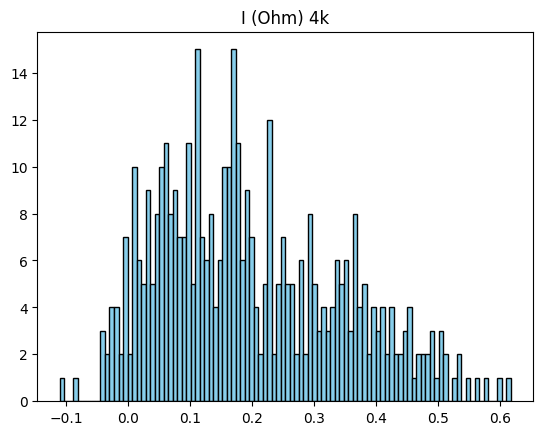

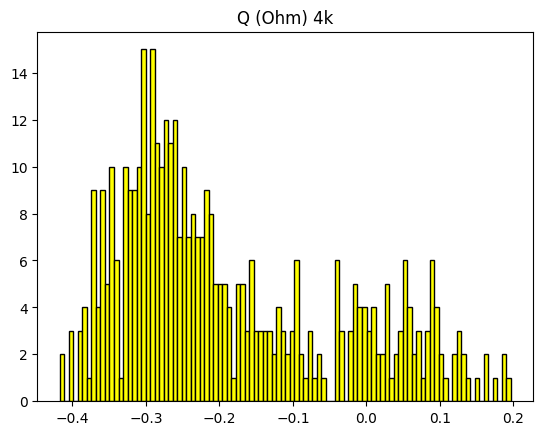

In [265]:
z_real_131k = plt.hist(df_131k["Z_real_ohm"], bins=100, color="skyblue", edgecolor="black")
plt.title("I (Ohm) 4k")
plt.show(z_real_131k)

z_imag_4k = plt.hist(df_4k["Z_imag_ohm"], bins=100, color="yellow", edgecolor="black")
plt.title("Q (Ohm) 4k")
plt.show()

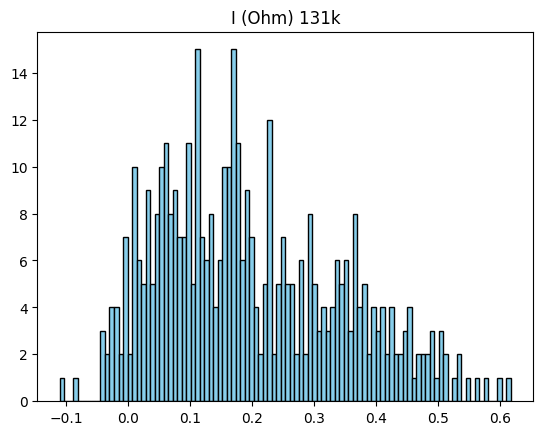

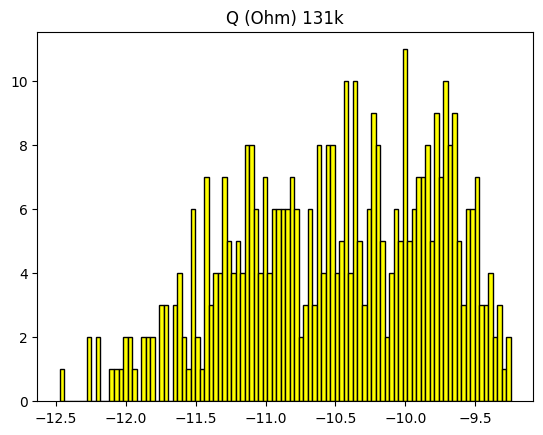

In [260]:
z_real_131k = plt.hist(df_131k["Z_real_ohm"], bins=100, color="skyblue", edgecolor="black")
plt.title("I (Ohm) 131k")
plt.show(z_real_131k)
z_imag_131k = plt.hist(df_131k["Z_imag_ohm"], bins=100, color="yellow", edgecolor="black")
plt.title("Q (Ohm) 131k")
plt.show(z_imag_131k)

In [246]:
df_4k.to_csv("df_4k.csv", index=False)
df_131k.to_csv("df_131k.csv", index=False)

In [264]:
# convert from counts to BioZ
print(f"131k Z_real: {df_131k['Z_real'].apply(counts_to_bioz).mean()}")
print(f"131k Z_imag: {df_131k['Z_imag'].apply(counts_to_bioz).mean()}")
print(f"4k   Z_real: {df_4k['Z_real'].apply(counts_to_bioz).mean()}")
print(f"4k   Z_imag: {df_4k['Z_imag'].apply(counts_to_bioz).mean()}")

131k Z_real: 0.19737809954553834
131k Z_imag: -10.50344748123428
4k   Z_real: 1.0699498687118143
4k   Z_imag: -0.1899050723550336
